# Data loading

## 필요 라이브러리 선언

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


## Dummy Data 만들기

### make_regression 함수를 통한 생성

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)


### a=2, B=1 인 더미데이터 생성 예시

In [3]:
# x_org = [1,2 , 3 , 4   ,5]
# y_org = [3,5 , 7 ,9.1   ,11.1 ]

# X = np.array(x_org)
# y = np.array(y_org)
# X=X.reshape( [5,-1])
# y=y.reshape( [5,-1])
# print(X.shape)
# print(y.shape)



y 값에 차원 추가

In [4]:
y = np.expand_dims(y, axis=1)
y.shape

(100, 1)

### Data 분석

(100, 1)
(100, 1)


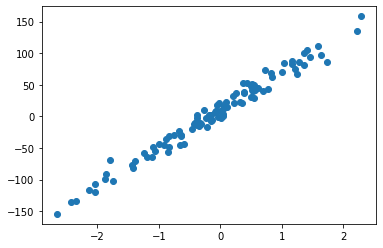

In [5]:
print(X.shape)
print(y.shape)

plt.scatter(X, y)
plt.show()

# Regression Example by Keras

## 훈련데이터와 평가데이터를 나눠주기

In [6]:
train_x = X[:80]
test_x = X[80:]

train_y = y[:80]
test_y = y[80:]


## Model 만들기

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear'))
optimizer = tf.keras.optimizers.SGD(0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])


## Model 훈련

In [8]:
model.fit(train_x, train_y, batch_size=10, epochs=100, shuffle=True)        


Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 3189.3367 - mse: 3189.3367
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 2327.1772 - mse: 2327.1772
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 1712.4268 - mse: 1712.4268
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1262.7800 - mse: 1262.7800
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 941.9745 - mse: 941.9745
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 706.6328 - mse: 706.6328
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 538.0044 - mse: 538.0044
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 416.7503 - mse: 416.7503
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 327.3319 - mse: 327.3318
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 262.7049 - mse: 262.7049
Epoch 11/100
8/8 [=============

In [9]:
6.6546e+10

66546000000.0

### Hidden Layer의 weights 값 보기

In [10]:
# dir(model)
# dir(model.layers[0])
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[59.031326]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([10.899742], dtype=float32)>]

# 모델 평가

### test 데이터의 일부를 활용해 직접 확인해보기

y 값 확인

In [11]:
test_y[0:4]

array([[ 30.20313981],
       [  9.95338046],
       [-65.01098105],
       [ 42.01483141]])

x 값 확인

In [12]:
test_x[0:4]

array([[ 0.50288142],
       [-0.26905696],
       [-1.11792545],
       [ 0.52429643]])

확인한 x 값을 돌려서 나온 결과물을 위의 y값 확인 한 것과 비교해본다.

In [13]:
model.predict(test_x[0:4])


array([[ 40.5855   ],
       [ -4.9830465],
       [-55.09288  ],
       [ 41.849655 ]], dtype=float32)

## 임의의 값으로 확인해보기

In [14]:
xx=np.array([[9]])
xx.shape

(1, 1)

In [15]:
model.predict( xx )

array([[542.18164]], dtype=float32)

In [16]:
model.predict( np.array([[0]]) )

array([[10.899742]], dtype=float32)

## test 데이터를 활용해 평가하기

In [17]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 121ms/step - loss: 101.5892 - mse: 101.5892


[101.58915710449219, 101.58915710449219]

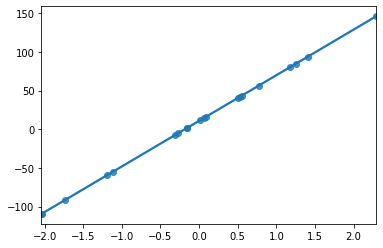

In [18]:
import seaborn as sns
sns.regplot(x=test_x,y=model.predict(test_x),fit_reg=True)
